# Data Science not from Scratch

The aim of this documents is a different implementation of some codes in [Data Science from scratch](http://shop.oreilly.com/product/0636920033400.do) ([GitHub](https://github.com/joelgrus/data-science-from-scratch)). In this book we use only plain Python, i.e. neither `numpy` nor `scikit-learn`. In these documents we use such a useful library to implement algorithms, etc.

- We implement not all scripts in the book. In particular we do not deal with chapters after 13, because the topics of the chapters are implementation of machine learning algorithms. Namely it is OK to create a learner instance with scikit-learn.
- The result (visualization, computation, etc) could be different from the ones from the book.
- Get a physical copy or a PDF to understand what we are doing in these documents.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from IPython.display import display
%matplotlib inline 
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

## Chapter 3: Visualizing Data

1950      300.2
1960      543.3
1970     1075.9
1980     2862.5
1990     5979.6
2000    10289.7
2010    14958.3
Name: gdp, dtype: float64

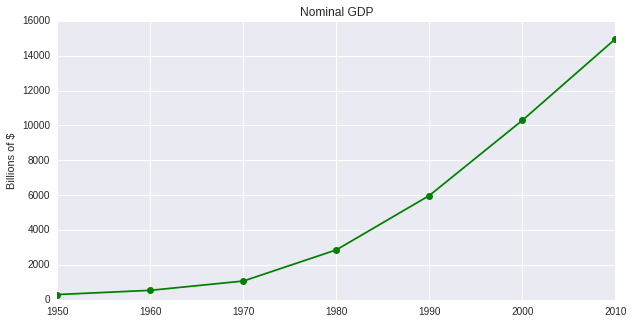

In [2]:
gdp = pd.Series([300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3],
                index=[1950, 1960, 1970, 1980, 1990, 2000, 2010],
                name='gdp')
display(gdp) ## print the data

gdp.plot(marker='o',color='green')
plt.title("Nominal GDP")
plt.ylabel("Billions of $");

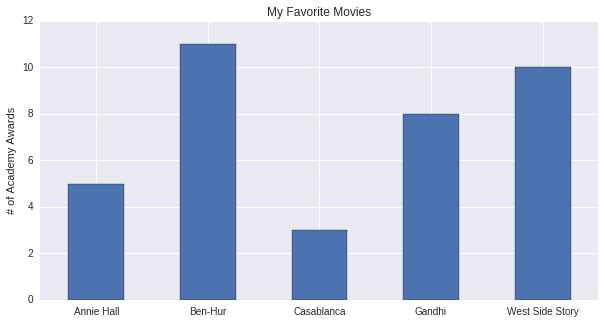

In [3]:
num_oscars = pd.Series([5, 11, 3, 8, 10],
                       index=["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"])
num_oscars.plot.bar()
plt.xticks(rotation='horizontal')
plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies");

[0, 10)       2
[10, 20)      0
[20, 30)      0
[30, 40)      0
[40, 50)      0
[50, 60)      0
[60, 70)      1
[70, 80)      3
[80, 90)      4
[90, 100)     2
[100, 110)    1
dtype: int64

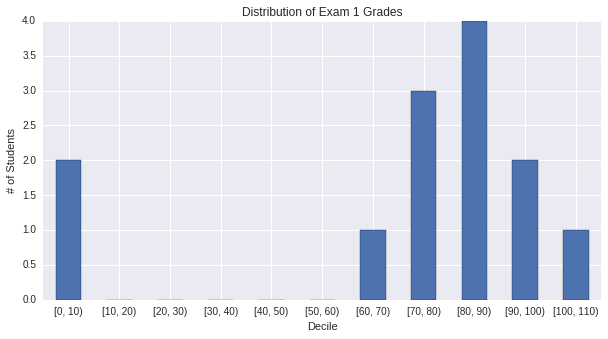

In [4]:
grades = pd.cut([83,95,91,87,70,0,85,82,100,67,73,77,0],
                bins=10*np.arange(12),
                right=False)
display(grades.value_counts())

grades.value_counts().plot.bar()
plt.xticks(rotation='horizontal')
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades");

,variance,bias_squared,total_error
0,1,256,257
1,2,128,130
2,4,64,68
3,8,32,40
4,16,16,32
5,32,8,40
6,64,4,68
7,128,2,130
8,256,1,257


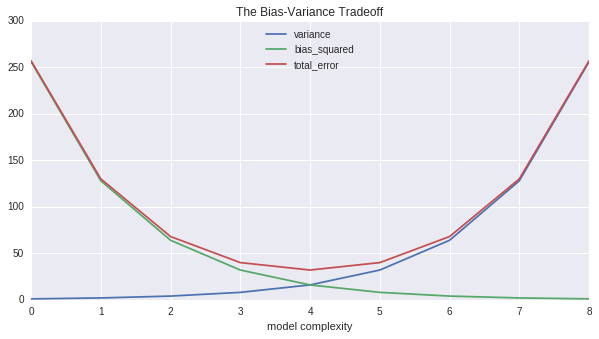

In [5]:
df = pd.DataFrame()
df['variance'] = [1, 2, 4, 8, 16, 32, 64, 128, 256]
df['bias_squared'] = [256, 128, 64, 32, 16, 8, 4, 2, 1]
df['total_error'] = df.variance + df.bias_squared
display(df)
df.plot()
plt.legend(loc='upper center')
plt.xlabel("model complexity")
plt.title("The Bias-Variance Tradeoff");

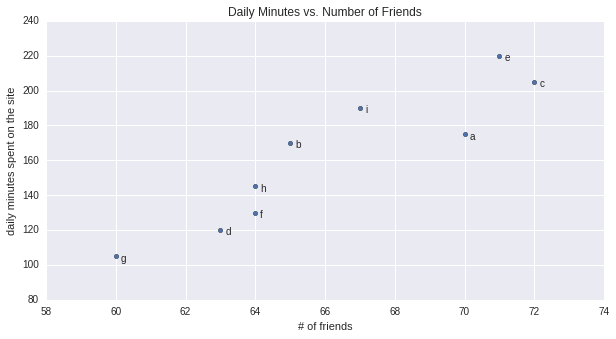

In [6]:
df = pd.DataFrame()
df['friends'] = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
df['minutes'] = [175, 170, 205, 120, 220, 130, 105, 145, 190]
df['labels'] = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
ax = df.plot.scatter(x='friends',y='minutes')

for i,row in df.iterrows():
    ax.annotate(row['labels'],
                xy=(row['friends'],row['minutes']),
                xytext=(5,-5),
                textcoords='offset points')

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site");

## Chapter 5: Statistics

In [7]:
num_friends = pd.Series( [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], name='num_friends')

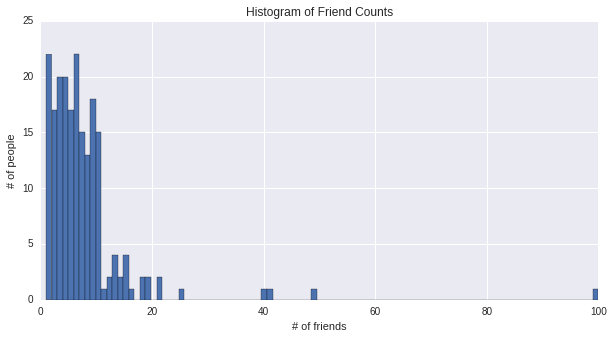

In [8]:
num_friends.hist(bins=100)

plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people");

In [9]:
num_friends.describe() ## simple statistics 

count    204.000000
mean       7.333333
std        9.030145
min        1.000000
25%        3.000000
50%        6.000000
75%        9.000000
max      100.000000
Name: num_friends, dtype: float64

In [10]:
for q in [10,25,75,90]:
    print('%sth-percentail = %d' % (q,np.percentile(num_friends,q)))

10th-percentail = 1
25th-percentail = 3
75th-percentail = 9
90th-percentail = 13


In [11]:
cnt = num_friends.value_counts()
cnt[cnt == cnt.max()]

1    22
6    22
Name: num_friends, dtype: int64

In [12]:
cnt.mode() ## chooses the smallest

0    1
dtype: int64

In [13]:
print('data range         :', num_friends.max() - num_friends.min())
print('variance           :', num_friends.var())
print('standard deviation :', num_friends.std())
print('interquartile range:', np.percentile(num_friends,75) - np.percentile(num_friends,25))

data range         : 99
variance           : 81.5435139573
standard deviation : 9.03014473623
interquartile range: 6.0


In [14]:
daily_minutes = pd.Series( [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84],name="daily_minutes")

In [15]:
np.corrcoef(num_friends,daily_minutes) ## correlation matrix

array([[ 1.        ,  0.24736957],
       [ 0.24736957,  1.        ]])

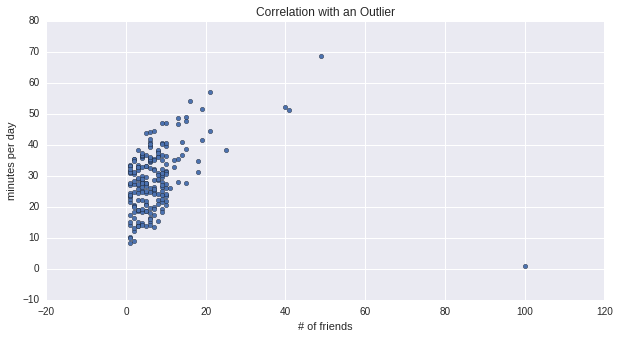

In [16]:
pd.concat([num_friends,daily_minutes],axis=1).plot.scatter(x='num_friends',y='daily_minutes')
plt.xlabel('# of friends')
plt.ylabel('minutes per day')
plt.title('Correlation with an Outlier');

In [17]:
df = pd.concat([num_friends,daily_minutes],axis=1)
df[df.num_friends < 60].corr() # correlation matrix after removing the outlier

,num_friends,daily_minutes
num_friends,1.000000,0.573679
daily_minutes,0.573679,1.000000


In [18]:
np.random.seed(1)
df = pd.DataFrame()
df['younger'] = [['boy','girl'][x] for x in np.random.randint(0,2,size=10000)]
df['older'] = [['boy','girl'][x] for x in np.random.randint(0,2,size=10000)]
df['both_girl'] = np.logical_and(df.younger=='girl', df.older=='girl')
df['either_girl'] = np.logical_or(df.younger=='girl', df.older=='girl')
df.head() # first 5 families

,younger,older,both_girl,either_girl
0,girl,boy,False,True
1,girl,girl,True,True
2,boy,girl,False,True
3,boy,boy,False,False
4,girl,girl,True,True


In [19]:
print('P(both|older) :', df.both_girl.sum()/(df.older=='girl').sum())
print('P(both|either):', df.both_girl.sum()/df.either_girl.sum())

P(both|older) : 0.498789346247
P(both|either): 0.330569671035


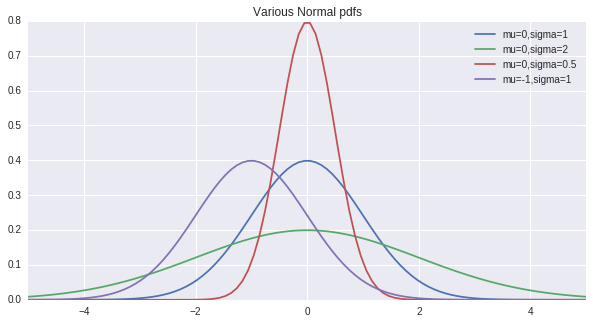

In [20]:
xs = np.linspace(-5,5,num=100)
df = pd.DataFrame(index=xs)
for mu, sigma in zip([0,0,0,-1], [1,2,0.5,1]):
    df['mu=%s,sigma=%s' % (mu,sigma)] = stats.norm.pdf(xs,mu,sigma)
df.plot()
plt.title('Various Normal pdfs');

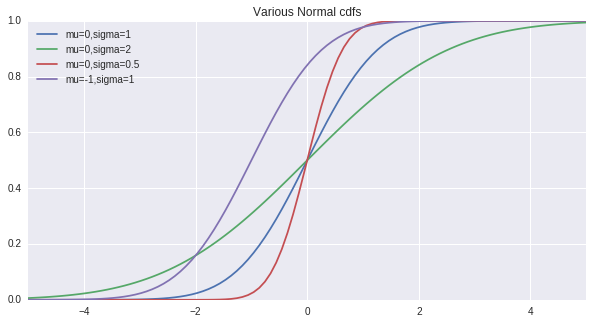

In [21]:
df = pd.DataFrame(index=xs)
for mu, sigma in zip([0,0,0,-1], [1,2,0.5,1]):
    df['mu=%s,sigma=%s' % (mu,sigma)] = stats.norm.cdf(xs,mu,sigma)
df.plot()
plt.title('Various Normal cdfs');

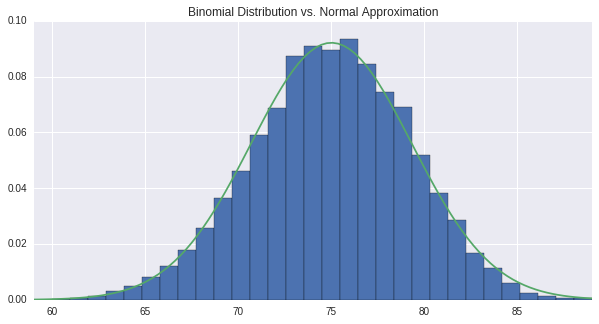

In [22]:
np.random.seed(4)
p, n, num_points = 0.75, 100, 10000

data = pd.Series(stats.binom.rvs(n,p,size=num_points))
ax = data.hist(normed=True,bins=data.max()-data.min()+1)

mu, sigma = p*n, np.sqrt(n*p*(1-p))
xs = np.linspace(data.min(),data.max(),100)
approx = pd.Series(stats.norm.pdf(xs,mu,sigma),index=xs)
approx.plot(ax=ax)
plt.title('Binomial Distribution vs. Normal Approximation');

## Chapter 7: Hypothesis and Inference

In [23]:
alpha = 0.05 ## significance level
lo, hi = stats.binom.ppf(alpha/2,1000,0.5), stats.binom.ppf(1-alpha/2,1000,0.5)
print('normal_two_sided_bounds:',(lo,hi))

np.random.seed(9)
flipping = stats.bernoulli.rvs(0.5,size=1000) ## flipping a coin 1000 times
print('number of heads:', np.sum(flipping))

normal_two_sided_bounds: (469.0, 531.0)
number of heads: 510


In the book we use a normal approximation to compute the confidence interval. Since the inverse function of the CDF of the binomial distribution is available in Scipy we use it above. We may use the [survival function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html) `stats.binom.sf()` to compute `hi` above.

A computation of the confidence interval with a normal approximation is follows.

In [24]:
mu0, sigma0 = 0.5*1000, np.sqrt(1000*0.5*(1-0.5))
round(stats.norm.ppf(alpha/2,mu0,sigma0)), round(stats.norm.ppf(1-alpha/2,mu0,sigma0))

(469.0, 531.0)

In [25]:
## if p is really 0.55
## type_2_probability is the probability that H_0 is rejected (even though H_0 is false).
type_2_probability = stats.binom.cdf(hi,1000,0.55) - stats.binom.cdf(lo,1000,0.55)
power = 1 - type_2_probability
print('power:', power)

power: 0.880117211729


A calculation with the normal approximation is following. Note that the power is the area under the PDF (of the actual distribution) outside the confidence interval.

power: 0.886422501396


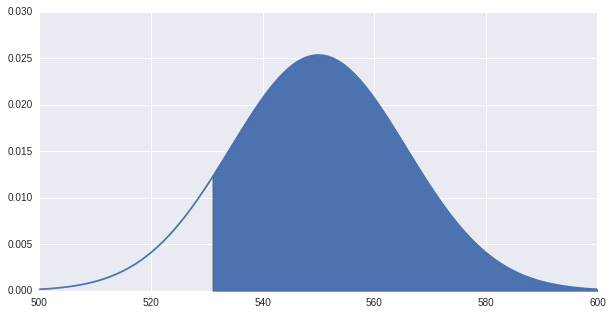

In [26]:
## if p is really 0.55
mu1, sigma1 = 0.55*1000, np.sqrt(1000*0.55*(1-0.55))

xs = np.linspace(hi,600,100)
plt.fill_between(xs,0,stats.norm.pdf(xs,mu1,sigma1))

xs = np.linspace(500,600,100)
plt.plot(xs,stats.norm.pdf(xs,mu1,sigma1))

type_2_probability = stats.norm.cdf(hi,mu1,sigma1) - stats.norm.cdf(lo,mu1,sigma1)
power = 1 - type_2_probability
print('power:', power)

In [27]:
## one-sided test
## H_0 : p <= 0.5
## The supremum of the probability of the error of type 2 (i.e. P(X>c|p)) is P(X>c|p=0.5)
## This must be less than alpha (0.05).
hi = stats.binom.ppf(1-0.05,1000,0.5)
print('threshold:',hi)

type_2_error = stats.binom.cdf(hi,1000,0.55)
print('power:', 1 - type_2_error)

threshold: 526.0
power: 0.93223072576


In [28]:
def reject_fairness(experiment): 
    num_heads = experiment.sum()
    return num_heads < 469 or 531 < num_heads

np.random.seed(2)
experiments = [stats.bernoulli.rvs(0.5,size=1000) < 0.5 for _ in range(1000)]
num_rejections = np.array([reject_fairness(experiment) for experiment in experiments]).sum()
num_rejections

52

### Example: Running an A/B Test

The idea of the calculation in the book is following. First we recall the central limit theorem

**Central Limit Theorem.** Let $X_1, \cdots, X_n$ be independent and identically distributed (i.i.d.) with $\mathbb E(X) = \mu$ and $\mathrm{Var}(X) = \sigma^2 < \infty$. If $n$ is enoughly large, 
$$\dfrac{1}{\sqrt{n}}\sum_{i=1}^n \frac{X_i-\mu}{\sigma} \sim \mathcal N(0,1).$$

This statement can also be written as: $\sum_i X_i \sim \mathcal(n\mu,n\sigma^2)$.

Let $X_1,\dots,X_{N_A}$ be i.i.d. with $X_1 \sim \mathrm{Bernoulli}(p_A)$ and 
$Y_1,\dots,Y_{N_B}$ be i.i.d. with $Y_1 \sim \mathrm{Bernoulli}(p_B)$. Then $\sum_i X_i$ and $\sum Y_i$ are both binomial distributed. If $N_A$ and $N_B$ are enoughly large, then we may assume that

- $\bar X \sim \mathcal N(p_A,\sigma_A^2)$ where $\sigma_A = \sqrt{p_A(1-p_A)}$, and 
- $\bar Y \sim \mathcal N(p_B,\sigma_B^2)$ where $\sigma_B = \sqrt{p_B(1-p_B)}$.

Thus $\bar X - \bar Y \sim \mathcal{N}(p_A - p_B, \sigma_A^2 + \sigma_B^2)$.

Now we suppose that the null hypothesis $p_A = p_B$ holds. Then $\bar X - \bar Y \sim \mathcal N(0, \sigma_A^2 + \sigma_B^2)$ and we can use it to compute the p-value.

In this document we simply apply a chi-squared test for goodness of fit 

In [29]:
def a_b_test(N_A,n_A,N_B,n_B):
    '''
    N_A, N_B : number of impressions of A and B, resp.
    n_A, n_B : number of conversions of A and B, resp.
    '''
    ctab = np.array([[N_A-n_A, N_B-n_B], [n_A, n_B]])
    _, pval, _, _ = stats.chi2_contingency(ctab)
    return(pval)

a_b_test(1000,200,1000,180)

0.27881856572687314

In [30]:
a_b_test(1000,200,1000,150)

0.0039315724322352419

### Bayesian Inference

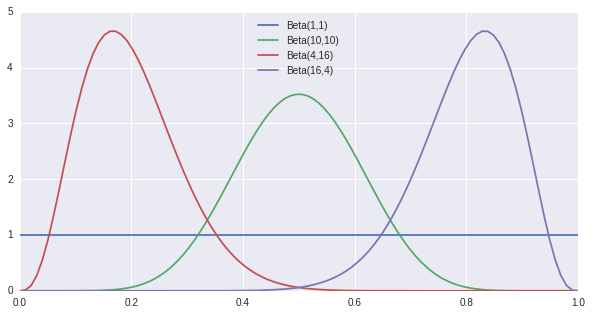

In [31]:
xs = np.linspace(0,1,100)
df = pd.DataFrame(index=xs)
for a,b in zip([1,10,4,16],[1,10,16,4]):
    df['Beta(%s,%s)' % (a,b)] = stats.beta.pdf(xs,a,b,)
df.plot();

## Chapter 8: Gradient Descent

When computing the derivative of a function, it is better use 
$$\frac{f(x+h)-f(x-h)}{2h}$$
because it is in $O(h^2)$ as $h \to 0$.

In [32]:
def estimate_gradient(f,v,h=0.00001):
    v = np.array(v)
    grad = np.zeros(len(v))
    for i in range(len(v)):
        vplus = v.copy()
        vplus[i] += h
        vminus = v.copy()
        vminus[i] -= h
        grad[i] = ((f(vplus)-f(vminus))/(2*h))
    return(grad)

In [33]:
def square(x):
    return(x[0]**2)

estimate_gradient(square,[8])

array([ 750000.])

## Chapter 10: Working with Data

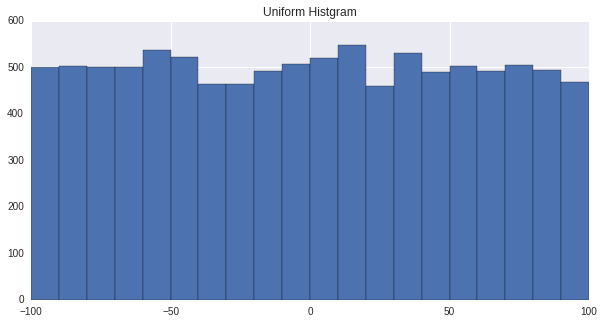

In [34]:
np.random.seed(1)
pd.Series(stats.uniform.rvs(loc=-100,scale=200,size=10000)).hist(bins=20)
plt.title('Uniform Histgram');

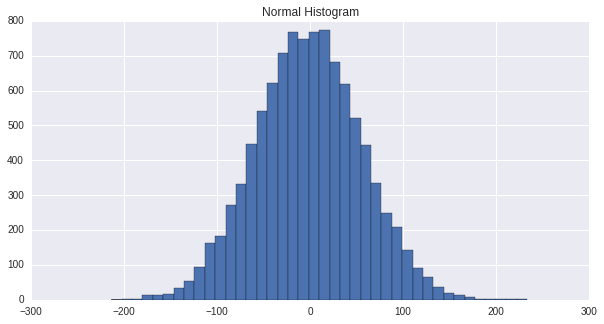

In [35]:
np.random.seed(3)
pd.Series(stats.norm.rvs(0,57,10000)).hist(bins=40)
plt.title('Normal Histogram');

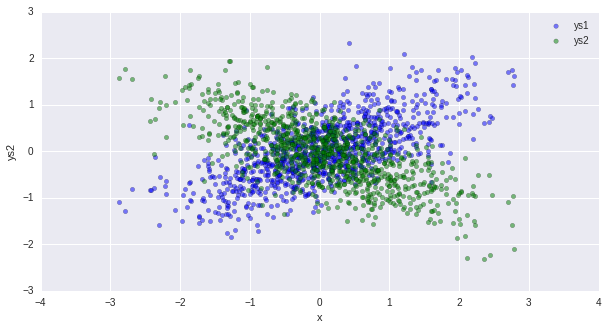

In [36]:
np.random.seed(4)
xs = stats.norm.rvs(0,1,size=1000)
df = pd.DataFrame()
df['x'] = xs
df['ys1'] = ( xs + stats.norm.rvs(0,1,size=1000))/2
df['ys2'] = (-xs + stats.norm.rvs(0,1,size=1000))/2

ax = df.plot.scatter(x='x',y='ys1',color='b',alpha=0.5,label='ys1')
df.plot.scatter(x='x',y='ys2',color='g',alpha=0.5,label='ys2',ax=ax);

### Many Dimensions

Scatterplot matrix can be easily obtained by using `sns.pairplot()`. The following code comes from
the [gallery](http://seaborn.pydata.org/examples/scatterplot_matrix.html) of visualization with `seaborn`.

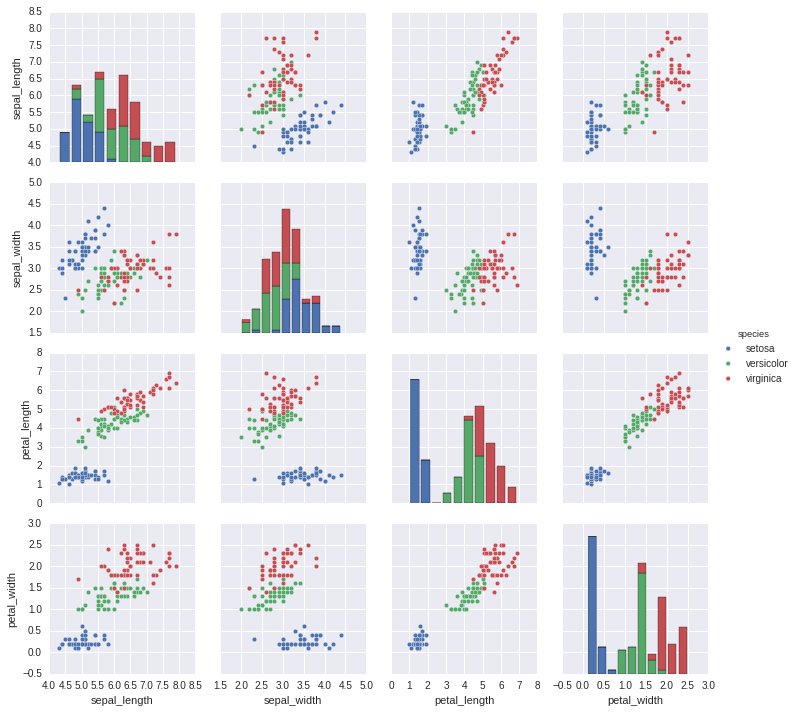

In [37]:
sns.pairplot(sns.load_dataset("iris"), hue="species");

### Dimensionally Reduction

In [38]:
X = [
    [20.9666776351559,-13.1138080189357],
    [22.7719907680008,-19.8890894944696],
    [25.6687103160153,-11.9956004517219],
    [18.0019794950564,-18.1989191165133],
    [21.3967402102156,-10.8893126308196],
    [0.443696899177716,-19.7221132386308],
    [29.9198322142127,-14.0958668502427],
    [19.0805843080126,-13.7888747608312],
    [16.4685063521314,-11.2612927034291],
    [21.4597664701884,-12.4740034586705],
    [3.87655283720532,-17.575162461771],
    [34.5713920556787,-10.705185165378],
    [13.3732115747722,-16.7270274494424],
    [20.7281704141919,-8.81165591556553],
    [24.839851437942,-12.1240962157419],
    [20.3019544741252,-12.8725060780898],
    [21.9021426929599,-17.3225432396452],
    [23.2285885715486,-12.2676568419045],
    [28.5749111681851,-13.2616470619453],
    [29.2957424128701,-14.6299928678996],
    [15.2495527798625,-18.4649714274207],
    [26.5567257400476,-9.19794350561966],
    [30.1934232346361,-12.6272709845971],
    [36.8267446011057,-7.25409849336718],
    [32.157416823084,-10.4729534347553],
    [5.85964365291694,-22.6573731626132],
    [25.7426190674693,-14.8055803854566],
    [16.237602636139,-16.5920595763719],
    [14.7408608850568,-20.0537715298403],
    [6.85907008242544,-18.3965586884781],
    [26.5918329233128,-8.92664811750842],
    [-11.2216019958228,-27.0519081982856],
    [8.93593745011035,-20.8261235122575],
    [24.4481258671796,-18.0324012215159],
    [2.82048515404903,-22.4208457598703],
    [30.8803004755948,-11.455358009593],
    [15.4586738236098,-11.1242825084309],
    [28.5332537090494,-14.7898744423126],
    [40.4830293441052,-2.41946428697183],
    [15.7563759125684,-13.5771266003795],
    [19.3635588851727,-20.6224770470434],
    [13.4212840786467,-19.0238227375766],
    [7.77570680426702,-16.6385739839089],
    [21.4865983854408,-15.290799330002],
    [12.6392705930724,-23.6433305964301],
    [12.4746151388128,-17.9720169566614],
    [23.4572410437998,-14.602080545086],
    [13.6878189833565,-18.9687408182414],
    [15.4077465943441,-14.5352487124086],
    [20.3356581548895,-10.0883159703702],
    [20.7093833689359,-12.6939091236766],
    [11.1032293684441,-14.1383848928755],
    [17.5048321498308,-9.2338593361801],
    [16.3303688220188,-15.1054735529158],
    [26.6929062710726,-13.306030567991],
    [34.4985678099711,-9.86199941278607],
    [39.1374291499406,-10.5621430853401],
    [21.9088956482146,-9.95198845621849],
    [22.2367457578087,-17.2200123442707],
    [10.0032784145577,-19.3557700653426],
    [14.045833906665,-15.871937521131],
    [15.5640911917607,-18.3396956121887],
    [24.4771926581586,-14.8715313479137],
    [26.533415556629,-14.693883922494],
    [12.8722580202544,-21.2750596021509],
    [24.4768291376862,-15.9592080959207],
    [18.2230748567433,-14.6541444069985],
    [4.1902148367447,-20.6144032528762],
    [12.4332594022086,-16.6079789231489],
    [20.5483758651873,-18.8512560786321],
    [17.8180560451358,-12.5451990696752],
    [11.0071081078049,-20.3938092335862],
    [8.30560561422449,-22.9503944138682],
    [33.9857852657284,-4.8371294974382],
    [17.4376502239652,-14.5095976075022],
    [29.0379635148943,-14.8461553663227],
    [29.1344666599319,-7.70862921632672],
    [32.9730697624544,-15.5839178785654],
    [13.4211493998212,-20.150199857584],
    [11.380538260355,-12.8619410359766],
    [28.672631499186,-8.51866271785711],
    [16.4296061111902,-23.3326051279759],
    [25.7168371582585,-13.8899296143829],
    [13.3185154732595,-17.8959160024249],
    [3.60832478605376,-25.4023343597712],
    [39.5445949652652,-11.466377647931],
    [25.1693484426101,-12.2752652925707],
    [25.2884257196471,-7.06710309184533],
    [6.77665715793125,-22.3947299635571],
    [20.1844223778907,-16.0427471125407],
    [25.5506805272535,-9.33856532270204],
    [25.1495682602477,-7.17350567090738],
    [15.6978431006492,-17.5979197162642],
    [37.42780451491,-10.843637288504],
    [22.974620174842,-10.6171162611686],
    [34.6327117468934,-9.26182440487384],
    [34.7042513789061,-6.9630753351114],
    [15.6563953929008,-17.2196961218915],
    [25.2049825789225,-14.1592086208169]
]
X = np.array(X)

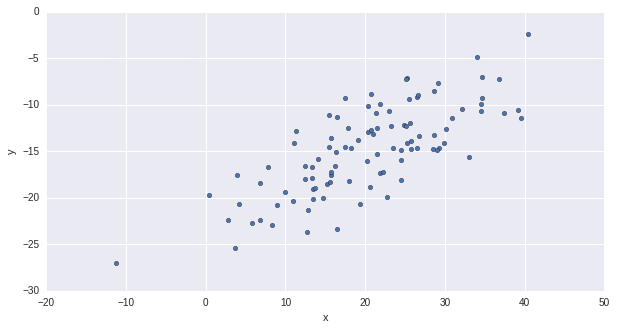

In [39]:
df = pd.DataFrame(X, columns=['x','y'])
df.plot.scatter(x='x',y='y');

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) ## PCA converter
X_pca = pca.fit_transform(X) ## compute the coordinates with respect to principal components
pca.explained_variance_ratio_ ## explained variance 

array([ 0.9260347,  0.0739653])

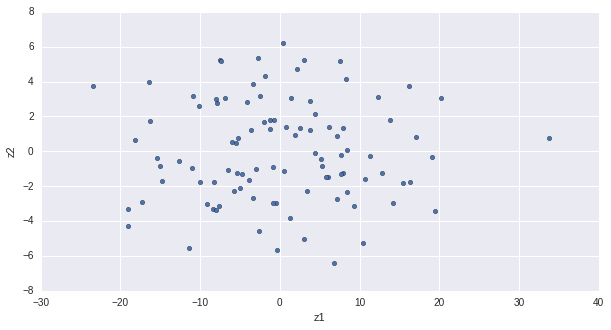

In [41]:
pd.DataFrame(X_pca,columns=['z1','z2']).plot.scatter(x='z1',y='z2');

## Chapter 11: Machine Learning

Use [`sklearn.model_selection.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for train test split.

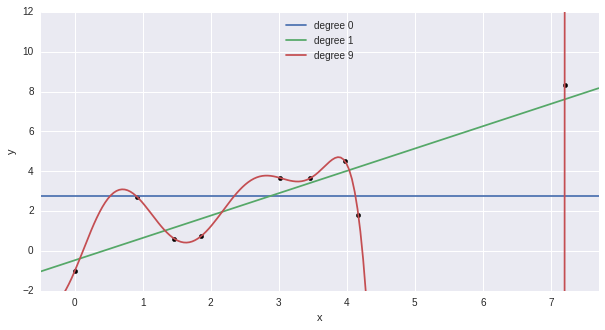

In [42]:
## generate the data 
np.random.seed(1)
df = pd.DataFrame()
df['x'] = stats.uniform.rvs(0,10,size=9)
df['y'] = df.x + stats.norm.rvs(0,1,size=9)
ax = df.plot.scatter(x='x',y='y',color='k') ## scatter plot of the data

xs = np.linspace(df.x.min()-0.5,df.x.max()+0.5,num=200)
df_model = pd.DataFrame(xs,columns=['x'])

## degree 0: mean value
df_model['degree 0'] = df.y.mean()

## degree 1: linear regression
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()
model_lin.fit(df[['x']],df.y)
df_model['degree 1'] = model_lin.predict(df_model[['x']])

## degree 9: polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(9, include_bias=False)
model_poly = LinearRegression()
model_poly.fit(poly.fit_transform(df[['x']]), df.y)
df_model['degree 9'] = model_poly.predict(poly.fit_transform(df_model[['x']]))

df_model.plot(x='x',y='degree 0', ax=ax)
df_model.plot(x='x',y='degree 1', ax=ax)
df_model.plot(x='x',y='degree 9', ax=ax)
plt.legend(loc='upper center')
plt.ylim(-2,12);
plt.xlim(df.x.min()-0.5,df.x.max()+0.5);

## Chapter 12: k-Nearest Neighbors

In [43]:
cities = [(-86.75,33.5666666666667,'Python'),(-88.25,30.6833333333333,'Python'),(-112.016666666667,33.4333333333333,'Java'),(-110.933333333333,32.1166666666667,'Java'),(-92.2333333333333,34.7333333333333,'R'),(-121.95,37.7,'R'),(-118.15,33.8166666666667,'Python'),(-118.233333333333,34.05,'Java'),(-122.316666666667,37.8166666666667,'R'),(-117.6,34.05,'Python'),(-116.533333333333,33.8166666666667,'Python'),(-121.5,38.5166666666667,'R'),(-117.166666666667,32.7333333333333,'R'),(-122.383333333333,37.6166666666667,'R'),(-121.933333333333,37.3666666666667,'R'),(-122.016666666667,36.9833333333333,'Python'),(-104.716666666667,38.8166666666667,'Python'),(-104.866666666667,39.75,'Python'),(-72.65,41.7333333333333,'R'),(-75.6,39.6666666666667,'Python'),(-77.0333333333333,38.85,'Python'),(-80.2666666666667,25.8,'Java'),(-81.3833333333333,28.55,'Java'),(-82.5333333333333,27.9666666666667,'Java'),(-84.4333333333333,33.65,'Python'),(-116.216666666667,43.5666666666667,'Python'),(-87.75,41.7833333333333,'Java'),(-86.2833333333333,39.7333333333333,'Java'),(-93.65,41.5333333333333,'Java'),(-97.4166666666667,37.65,'Java'),(-85.7333333333333,38.1833333333333,'Python'),(-90.25,29.9833333333333,'Java'),(-70.3166666666667,43.65,'R'),(-76.6666666666667,39.1833333333333,'R'),(-71.0333333333333,42.3666666666667,'R'),(-72.5333333333333,42.2,'R'),(-83.0166666666667,42.4166666666667,'Python'),(-84.6,42.7833333333333,'Python'),(-93.2166666666667,44.8833333333333,'Python'),(-90.0833333333333,32.3166666666667,'Java'),(-94.5833333333333,39.1166666666667,'Java'),(-90.3833333333333,38.75,'Python'),(-108.533333333333,45.8,'Python'),(-95.9,41.3,'Python'),(-115.166666666667,36.0833333333333,'Java'),(-71.4333333333333,42.9333333333333,'R'),(-74.1666666666667,40.7,'R'),(-106.616666666667,35.05,'Python'),(-78.7333333333333,42.9333333333333,'R'),(-73.9666666666667,40.7833333333333,'R'),(-80.9333333333333,35.2166666666667,'Python'),(-78.7833333333333,35.8666666666667,'Python'),(-100.75,46.7666666666667,'Java'),(-84.5166666666667,39.15,'Java'),(-81.85,41.4,'Java'),(-82.8833333333333,40,'Java'),(-97.6,35.4,'Python'),(-122.666666666667,45.5333333333333,'Python'),(-75.25,39.8833333333333,'Python'),(-80.2166666666667,40.5,'Python'),(-71.4333333333333,41.7333333333333,'R'),(-81.1166666666667,33.95,'R'),(-96.7333333333333,43.5666666666667,'Python'),(-90,35.05,'R'),(-86.6833333333333,36.1166666666667,'R'),(-97.7,30.3,'Python'),(-96.85,32.85,'Java'),(-95.35,29.9666666666667,'Java'),(-98.4666666666667,29.5333333333333,'Java'),(-111.966666666667,40.7666666666667,'Python'),(-73.15,44.4666666666667,'R'),(-77.3333333333333,37.5,'Python'),(-122.3,47.5333333333333,'Python'),(-89.3333333333333,43.1333333333333,'R'),(-104.816666666667,41.15,'Java')]

In [44]:
df = pd.DataFrame(cities,columns=['longtitude','latitude','language'])
df.head()

,longtitude,latitude,language
0,-86.750000,33.566667,Python
1,-88.250000,30.683333,Python
2,-112.016667,33.433333,Java
3,-110.933333,32.116667,Java
4,-92.233333,34.733333,R


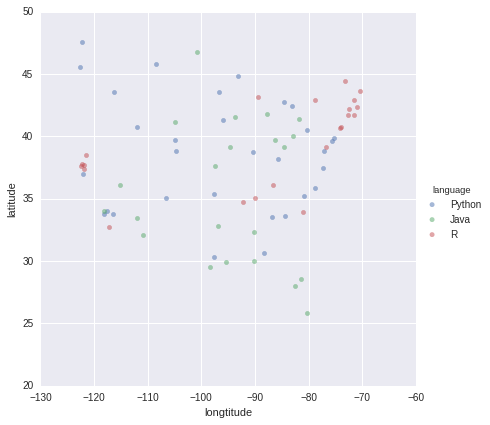

In [45]:
sns.FacetGrid(df,hue="language",size=6)\
    .map(plt.scatter,'longtitude','latitude',alpha=0.5)\
    .add_legend();

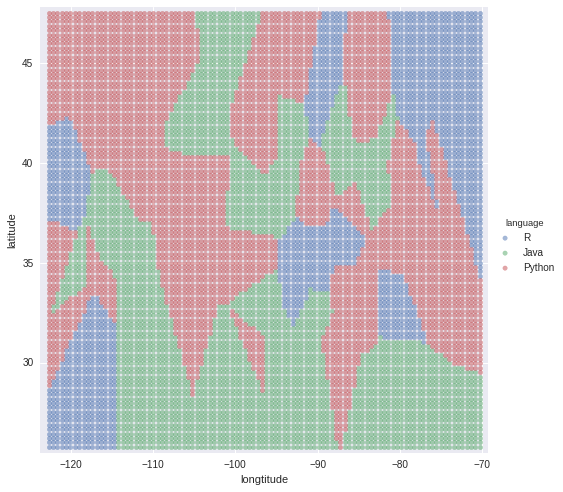

In [46]:
from sklearn.neighbors import KNeighborsClassifier

def knn(df,k=1):
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(df.drop('language',axis=1),df.language)

    lo = np.linspace(df.longtitude.min(),df.longtitude.max(),num=100)
    la = np.linspace(df.latitude.min(),df.latitude.max(),num=100)

    df_test = pd.DataFrame(np.transpose([np.tile(lo,len(la)),np.repeat(la,len(lo))]),
                           columns=['longtitude','latitude'])

    df_test['language'] = model_knn.predict(df_test)

    sns.FacetGrid(df_test,hue="language",size=7)\
        .map(plt.scatter,'longtitude','latitude',alpha=0.5)\
        .add_legend();
    plt.xlim(df.longtitude.min()-1,df.longtitude.max()+1)
    plt.ylim(df.latitude.min()-0.3,df.latitude.max()+0.3)
    plt.show()

knn(df,1)

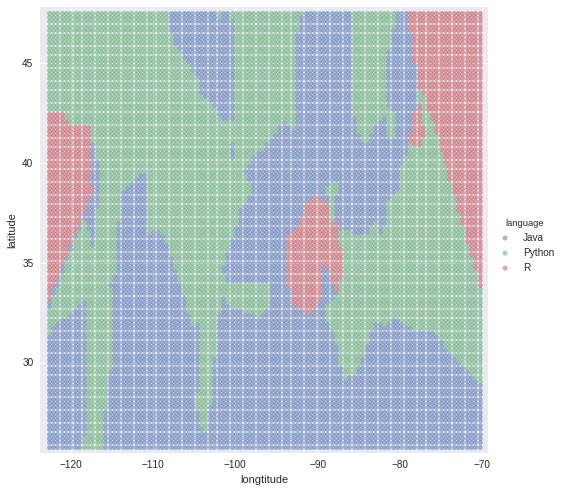

In [47]:
knn(df,3)

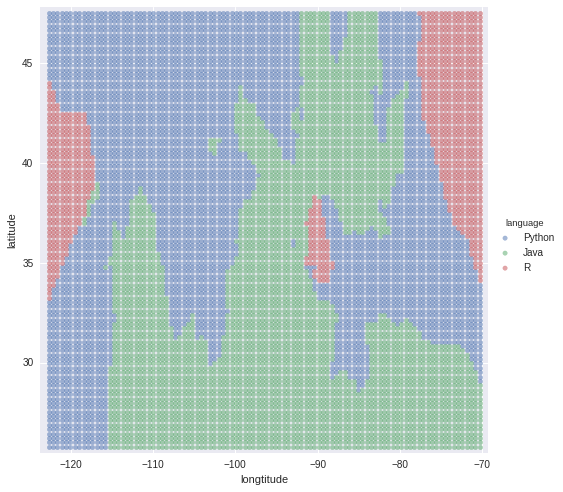

In [48]:
knn(df,5)